In [23]:
import pandas as pd
import requests
import json
from tqdm import tnrange
import time
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\zone\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\zone\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [27]:
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
font_location = 'C:/Windows/Fonts/gulim.ttc'
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

In [31]:
sns.set(style='darkgrid')

In [5]:
%matplotlib inline

In [6]:
data = pd.read_pickle('data/saving_data/data_info_float.pkl')

In [7]:
data.head()

,blueteamId,bluewin,bluefirstBlood,bluefirstTower,bluefirstInhibitor,bluefirstBaron,bluefirstDragon,bluefirstRiftHerald,bluetowerKills,blueinhibitorKills,...,9stats.win,9teamId,9timeline.creepsPerMinDeltas.0-10,9timeline.creepsPerMinDeltas.10-20,9timeline.goldPerMinDeltas.0-10,9timeline.goldPerMinDeltas.10-20,9timeline.lane,9timeline.xpPerMinDeltas.0-10,9timeline.xpPerMinDeltas.10-20,gameDurationM
0,100.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,8.0,1.0,...,0.0,200.0,2.2,1.1,189.7,262.7,BOTTOM,280.7,305.2,24.58
1,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,200.0,8.6,9.9,369.2,834.7,BOTTOM,326.0,753.0,23.40
2,100.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,...,1.0,200.0,6.6,7.2,296.8,524.6,JUNGLE,416.8,516.6,28.70
3,100.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,200.0,0.5,0.0,414.5,0.0,NONE,424.5,0.0,16.08
4,100.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,7.0,1.0,...,0.0,200.0,6.3,0.0,244.0,0.0,NONE,226.5,0.0,13.53


In [19]:
'''
blue팀이 드래곤의 영혼을 획득했으나 red팀이 이긴 경기
'''
data_blue_dragon = data[data['bluedragonKills'] >= 4]
data_blue_dragon_red_win = data_blue_dragon[data_blue_dragon['redwin'] == 1]
data_blue_dragon_red_win

,blueteamId,bluewin,bluefirstBlood,bluefirstTower,bluefirstInhibitor,bluefirstBaron,bluefirstDragon,bluefirstRiftHerald,bluetowerKills,blueinhibitorKills,...,9stats.win,9teamId,9timeline.creepsPerMinDeltas.0-10,9timeline.creepsPerMinDeltas.10-20,9timeline.goldPerMinDeltas.0-10,9timeline.goldPerMinDeltas.10-20,9timeline.lane,9timeline.xpPerMinDeltas.0-10,9timeline.xpPerMinDeltas.10-20,gameDurationM
431,100.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,...,1.0,200.0,6.6,7.8,313.3,592.3,TOP,446.2,608.3,32.17
618,100.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,...,1.0,200.0,1.1,0.9,183.9,300.5,BOTTOM,241.8,405.3,30.78
667,100.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,7.0,1.0,...,1.0,200.0,4.0,5.9,237.1,372.3,JUNGLE,358.3,545.7,38.45
679,100.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8.0,2.0,...,1.0,200.0,5.9,7.6,327.4,567.6,MIDDLE,433.2,548.9,32.77
1106,100.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,...,1.0,200.0,1.2,1.8,363.7,534.3,JUNGLE,357.8,546.2,35.60
1133,100.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,7.0,1.0,...,1.0,200.0,6.3,3.5,270.5,299.3,TOP,470.6,418.4,49.67
1156,100.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,4.0,0.0,...,1.0,200.0,0.3,1.5,161.1,225.7,BOTTOM,207.7,321.4,34.10
1176,100.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,9.0,2.0,...,1.0,200.0,5.0,8.9,365.6,509.3,TOP,385.3,546.0,34.48
1226,100.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,6.0,0.0,...,1.0,200.0,7.5,7.8,285.0,350.6,MIDDLE,448.2,500.7,34.88
1414,100.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,6.0,1.0,...,1.0,200.0,6.3,10.4,225.5,444.7,TOP,461.4,628.4,40.72


In [20]:
'''
red팀이 드래곤의 영혼을 획득했으나 blue팀이 이긴 경기
'''
data_red_dragon = data[data['reddragonKills'] >= 4]
data_red_dragon_blue_win = data_red_dragon[data_red_dragon['bluewin'] == 1]
data_red_dragon_blue_win

,blueteamId,bluewin,bluefirstBlood,bluefirstTower,bluefirstInhibitor,bluefirstBaron,bluefirstDragon,bluefirstRiftHerald,bluetowerKills,blueinhibitorKills,...,9stats.win,9teamId,9timeline.creepsPerMinDeltas.0-10,9timeline.creepsPerMinDeltas.10-20,9timeline.goldPerMinDeltas.0-10,9timeline.goldPerMinDeltas.10-20,9timeline.lane,9timeline.xpPerMinDeltas.0-10,9timeline.xpPerMinDeltas.10-20,gameDurationM
89,100.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,7.0,1.0,...,0.0,200.0,7.5,9.2,413.6,603.3,MIDDLE,461.5,652.5,28.47
140,100.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,11.0,3.0,...,0.0,200.0,1.1,1.1,168.3,262.3,BOTTOM,196.5,407.7,42.37
244,100.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,11.0,3.0,...,0.0,200.0,5.5,6.9,286.4,494.0,TOP,422.7,560.7,38.20
314,100.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,10.0,2.0,...,0.0,200.0,7.0,9.0,314.1,489.4,BOTTOM,308.0,483.2,32.32
419,100.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,8.0,1.0,...,0.0,200.0,5.2,3.4,337.1,363.8,TOP,501.3,417.3,33.83
490,100.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,7.0,1.0,...,0.0,200.0,1.4,1.7,175.6,476.1,BOTTOM,261.3,277.6,38.55
596,100.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,11.0,2.0,...,0.0,200.0,0.4,0.7,275.4,352.1,JUNGLE,296.7,447.0,35.72
665,100.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,9.0,2.0,...,0.0,200.0,5.8,7.2,357.2,551.5,TOP,475.2,558.2,29.98
716,100.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,9.0,2.0,...,0.0,200.0,1.0,1.5,210.5,341.1,BOTTOM,205.1,377.0,31.05
749,100.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,11.0,3.0,...,0.0,200.0,8.1,9.0,298.3,397.7,TOP,465.3,558.3,39.25


In [21]:
data_turned = data_blue_dragon_red_win.append(data_red_dragon_blue_win, ignore_index=True)
data_turned

,blueteamId,bluewin,bluefirstBlood,bluefirstTower,bluefirstInhibitor,bluefirstBaron,bluefirstDragon,bluefirstRiftHerald,bluetowerKills,blueinhibitorKills,...,9stats.win,9teamId,9timeline.creepsPerMinDeltas.0-10,9timeline.creepsPerMinDeltas.10-20,9timeline.goldPerMinDeltas.0-10,9timeline.goldPerMinDeltas.10-20,9timeline.lane,9timeline.xpPerMinDeltas.0-10,9timeline.xpPerMinDeltas.10-20,gameDurationM
0,100.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,...,1.0,200.0,6.6,7.8,313.3,592.3,TOP,446.2,608.3,32.17
1,100.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,...,1.0,200.0,1.1,0.9,183.9,300.5,BOTTOM,241.8,405.3,30.78
2,100.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,7.0,1.0,...,1.0,200.0,4.0,5.9,237.1,372.3,JUNGLE,358.3,545.7,38.45
3,100.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8.0,2.0,...,1.0,200.0,5.9,7.6,327.4,567.6,MIDDLE,433.2,548.9,32.77
4,100.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,...,1.0,200.0,1.2,1.8,363.7,534.3,JUNGLE,357.8,546.2,35.60
5,100.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,7.0,1.0,...,1.0,200.0,6.3,3.5,270.5,299.3,TOP,470.6,418.4,49.67
6,100.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,4.0,0.0,...,1.0,200.0,0.3,1.5,161.1,225.7,BOTTOM,207.7,321.4,34.10
7,100.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,9.0,2.0,...,1.0,200.0,5.0,8.9,365.6,509.3,TOP,385.3,546.0,34.48
8,100.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,6.0,0.0,...,1.0,200.0,7.5,7.8,285.0,350.6,MIDDLE,448.2,500.7,34.88
9,100.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,6.0,1.0,...,1.0,200.0,6.3,10.4,225.5,444.7,TOP,461.4,628.4,40.72


1. 게임 시간 분석

In [22]:
data_turned['gameDurationM']

35.33833333333334

In [29]:
data_turned.index

RangeIndex(start=0, stop=174, step=1)

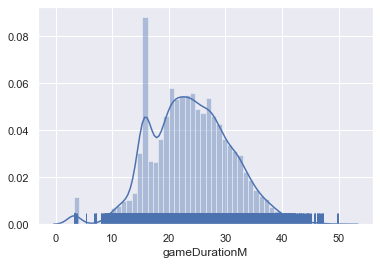

In [38]:
sns.distplot(data['gameDurationM'], kde=True, rug=True)

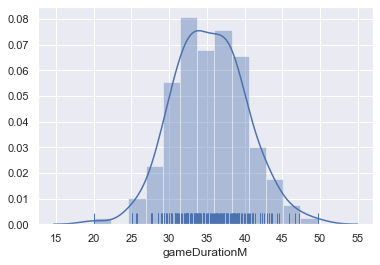

In [36]:
sns.distplot(data_turned['gameDurationM'], kde=True, rug=True)

In [41]:
data_turned['gameDurationM'].mean() / data['gameDurationM'].mean()

1.48194577915962

2. 대형 오브젝트 컨트롤

2.2.1 드래곤

In [53]:
'''
blue팀이 드래곤 영혼을 먹고 졌을때 red팀이 먹은 드래곤의 개수
'''
dragon_at_red_turned = data_blue_dragon_red_win['reddragonKills']

In [54]:
'''
red팀이 드래곤 영혼을 먹고 졌을때 blue팀이 먹은 드래곤의 개수
'''
dragon_at_blue_turned = data_red_dragon_blue_win['bluedragonKills']

In [56]:
'''
위 두개를 합쳐 역전한 게임에서 먹은 드래곤의 개수
'''
dragon_at_turned = dragon_at_red_turned.append(dragon_at_blue_turned, ignore_index=True)
dragon_at_turned

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
5      1.0
6      1.0
7      1.0
8      1.0
9      1.0
10     1.0
11     0.0
12     1.0
13     1.0
14     1.0
15     2.0
16     3.0
17     1.0
18     1.0
19     1.0
20     2.0
21     1.0
22     3.0
23     3.0
24     0.0
25     1.0
26     1.0
27     0.0
28     1.0
29     1.0
      ... 
144    2.0
145    0.0
146    1.0
147    1.0
148    2.0
149    2.0
150    1.0
151    1.0
152    0.0
153    1.0
154    1.0
155    1.0
156    1.0
157    1.0
158    2.0
159    0.0
160    1.0
161    1.0
162    2.0
163    1.0
164    1.0
165    1.0
166    1.0
167    2.0
168    1.0
169    1.0
170    2.0
171    0.0
172    2.0
173    1.0
Length: 174, dtype: float64

In [57]:
data_turned['dragon_at_turned'] = dragon_at_turned

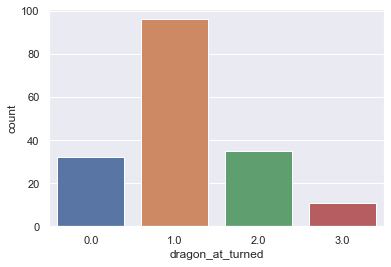

In [59]:
sns.countplot(x='dragon_at_turned', data=data_turned)
plt.show()

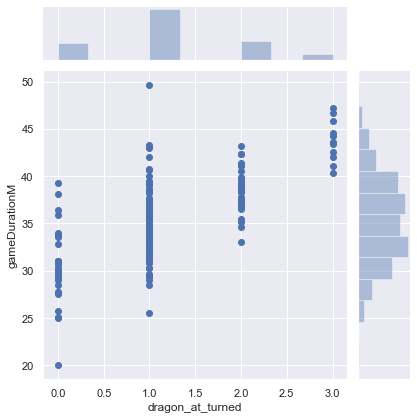

In [60]:
sns.jointplot(x='dragon_at_turned', y='gameDurationM', data=data_turned)
plt.show()

2.2.2 협곡의 전령과 내셔 남작

In [95]:
'''
협곡의 전령에 대한 내용만 저정하기 위한 df생성
'''
df2_2 = pd.DataFrame()

In [96]:
df2_2['gamedurationM'] = data_turned['gameDurationM']

In [116]:
'''
blue팀이 드래곤 영혼을 먹고 졌을때 red팀이 먹은 전령의 개수
'''
Herald_at_red_turned = data_blue_dragon_red_win['redriftHeraldKills']

In [98]:
'''
red팀이 드래곤 영혼을 먹고 졌을때 blue팀이 먹은 전령의 개수
'''
Herald_at_blue_turned = data_red_dragon_blue_win['blueriftHeraldKills']

In [99]:
'''
위 두개를 합쳐 역전한 게임에서 먹은 전령의 개수
'''
Herald_at_turned = Herald_at_red_turned.append(Herald_at_blue_turned, ignore_index=True)

In [100]:
df2_2['Herald_at_turned'] = Herald_at_turned

In [104]:
df2_2.head()

,gamedurationM,Herald_at_turned
0,32.17,1.0
1,30.78,2.0
2,38.45,0.0
3,32.77,1.0
4,35.60,2.0


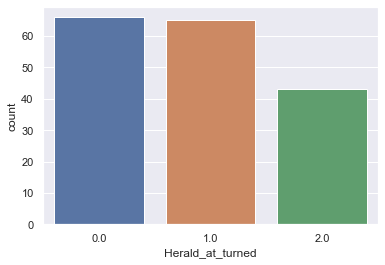

In [106]:
sns.countplot(x='Herald_at_turned', data=df2_2)
plt.show()

In [112]:
((df2_2['Herald_at_turned'] == 1).sum() + (df2_2['Herald_at_turned'] == 2).sum()) / len(df2_2['Herald_at_turned'])

0.6206896551724138

In [114]:
(df2_2['Herald_at_turned'] == 2).sum() / len(df2_2['Herald_at_turned'])

0.2471264367816092

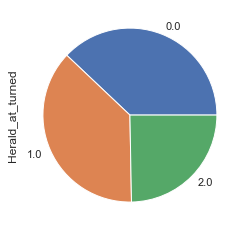

In [113]:
df2_2.Herald_at_turned.value_counts().plot(kind='pie')

2.2.3 내셔 남작

In [117]:
'''
blue팀이 드래곤 영혼을 먹고 졌을때 red팀이 먹은 바론의 개수
'''
baron_at_red_turned = data_blue_dragon_red_win['redbaronKills']

431     1.0
618     1.0
667     1.0
679     2.0
1106    2.0
1133    1.0
1156    2.0
1176    2.0
1226    1.0
1414    2.0
1942    2.0
1954    1.0
2001    1.0
2049    1.0
2093    2.0
2097    1.0
2156    1.0
2161    0.0
2278    2.0
2371    1.0
2473    3.0
2840    1.0
2957    1.0
3392    1.0
3438    1.0
3555    1.0
3568    3.0
3613    1.0
3719    2.0
4113    1.0
       ... 
6357    1.0
6405    0.0
6508    1.0
6691    1.0
6723    1.0
6811    2.0
6914    0.0
6921    2.0
7073    1.0
7211    2.0
7244    0.0
7567    2.0
7584    0.0
7773    1.0
7852    1.0
8171    1.0
8415    1.0
8481    2.0
8488    2.0
8558    1.0
8616    2.0
8643    0.0
8850    1.0
9168    1.0
9538    1.0
9584    1.0
9811    3.0
9861    1.0
9888    1.0
9964    0.0
Name: redbaronKills, Length: 80, dtype: float64

In [118]:
'''
red팀이 드래곤 영혼을 먹고 졌을때 blue팀이 먹은 바론의 개수
'''
baron_at_blue_turned = data_red_dragon_blue_win['bluebaronKills']

In [119]:
'''
위 두개를 합쳐 역전한 게임에서 먹은 바론의 개수
'''
baron_at_turned = baron_at_red_turned.append(baron_at_blue_turned, ignore_index=True)

In [120]:
df2_2['baron_at_turned'] = baron_at_turned

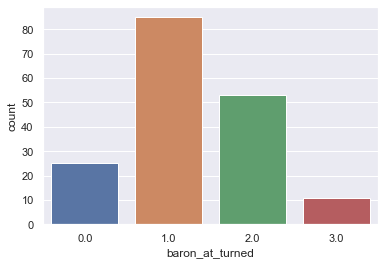

In [125]:
sns.countplot(x='baron_at_turned', data=df2_2)
plt.show()

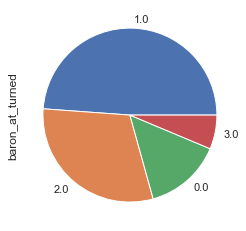

In [126]:
df2_2.baron_at_turned.value_counts().plot(kind='pie')

In [128]:
((df2_2['baron_at_turned'] == 1).sum() + (df2_2['baron_at_turned'] == 2).sum() + (df2_2['baron_at_turned'] == 3).sum()) / len(df2_2['baron_at_turned'])

0.8563218390804598

2.3 골드 획득량

In [147]:
df2_3 = pd.DataFrame()

In [131]:
df2_3['gameDurationM'] = data_turned['gameDurationM']

In [143]:
blue_total_goldEarned = data_turned['1stats.goldEarned'] + data_turned['2stats.goldEarned'] +\
                        data_turned['3stats.goldEarned'] + data_turned['4stats.goldEarned'] +\
                        data_turned['5stats.goldEarned']
red_total_goldEarned = data_turned['6stats.goldEarned'] + data_turned['7stats.goldEarned'] +\
                        data_turned['8stats.goldEarned'] + data_turned['9stats.goldEarned'] +\
                        data_turned['10stats.goldEarned']

In [149]:
data_blue_dragon_red_win_copy = data_blue_dragon_red_win.copy()
data_red_dragon_blue_win_copy = data_red_dragon_blue_win.copy()

In [151]:
'''
red가 역전승했을때 각 진영의 골드 획득량
'''
data_blue_dragon_red_win_copy['blue_total_goldEarned'] = \
                        data_blue_dragon_red_win_copy['1stats.goldEarned'] +\
                        data_blue_dragon_red_win_copy['2stats.goldEarned'] +\
                        data_blue_dragon_red_win_copy['3stats.goldEarned'] +\
                        data_blue_dragon_red_win_copy['4stats.goldEarned'] +\
                        data_blue_dragon_red_win_copy['5stats.goldEarned']
data_blue_dragon_red_win_copy['red_total_goldEarned'] = \
                        data_blue_dragon_red_win_copy['6stats.goldEarned'] +\
                        data_blue_dragon_red_win_copy['7stats.goldEarned'] +\
                        data_blue_dragon_red_win_copy['8stats.goldEarned'] +\
                        data_blue_dragon_red_win_copy['9stats.goldEarned'] +\
                        data_blue_dragon_red_win_copy['10stats.goldEarned']

In [153]:
'''
blue가 역전승했을때 각 진영의 골드 획득량
'''
data_red_dragon_blue_win_copy['blue_total_goldEarned'] = \
                        data_red_dragon_blue_win_copy['1stats.goldEarned'] +\
                        data_red_dragon_blue_win_copy['2stats.goldEarned'] +\
                        data_red_dragon_blue_win_copy['3stats.goldEarned'] +\
                        data_red_dragon_blue_win_copy['4stats.goldEarned'] +\
                        data_red_dragon_blue_win_copy['5stats.goldEarned']
data_red_dragon_blue_win_copy['red_total_goldEarned'] = \
                        data_red_dragon_blue_win_copy['6stats.goldEarned'] +\
                        data_red_dragon_blue_win_copy['7stats.goldEarned'] +\
                        data_red_dragon_blue_win_copy['8stats.goldEarned'] +\
                        data_red_dragon_blue_win_copy['9stats.goldEarned'] +\
                        data_red_dragon_blue_win_copy['10stats.goldEarned']

In [155]:
'''
진팀 골드 획득량 / 이긴팀 골드 획득량 = gold_ratio 로 표현
이긴팀 골드 획득량 - 진팀 골드 획득량 = gold_diff 로 표현
'''

data_blue_dragon_red_win_copy['gold_ratio'] = data_blue_dragon_red_win_copy['blue_total_goldEarned'] /\
                                              data_blue_dragon_red_win_copy['red_total_goldEarned']
data_blue_dragon_red_win_copy['gold_diff'] = data_blue_dragon_red_win_copy['red_total_goldEarned'] -\
                                             data_blue_dragon_red_win_copy['blue_total_goldEarned']

In [156]:
data_blue_dragon_red_win_copy

,blueteamId,bluewin,bluefirstBlood,bluefirstTower,bluefirstInhibitor,bluefirstBaron,bluefirstDragon,bluefirstRiftHerald,bluetowerKills,blueinhibitorKills,...,9timeline.goldPerMinDeltas.0-10,9timeline.goldPerMinDeltas.10-20,9timeline.lane,9timeline.xpPerMinDeltas.0-10,9timeline.xpPerMinDeltas.10-20,gameDurationM,blue_total_goldEarned,red_total_goldEarned,gold_ratio,gold_diff
431,100.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,...,313.3,592.3,TOP,446.2,608.3,32.17,55966.0,65139.0,0.859178,9173.0
618,100.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,...,183.9,300.5,BOTTOM,241.8,405.3,30.78,59380.0,64370.0,0.922479,4990.0
667,100.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,7.0,1.0,...,237.1,372.3,JUNGLE,358.3,545.7,38.45,71132.0,78659.0,0.904308,7527.0
679,100.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8.0,2.0,...,327.4,567.6,MIDDLE,433.2,548.9,32.77,66135.0,67946.0,0.973346,1811.0
1106,100.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,...,363.7,534.3,JUNGLE,357.8,546.2,35.60,66687.0,75284.0,0.885806,8597.0
1133,100.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,7.0,1.0,...,270.5,299.3,TOP,470.6,418.4,49.67,90383.0,87570.0,1.032123,-2813.0
1156,100.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,4.0,0.0,...,161.1,225.7,BOTTOM,207.7,321.4,34.10,59722.0,68414.0,0.872950,8692.0
1176,100.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,9.0,2.0,...,365.6,509.3,TOP,385.3,546.0,34.48,65016.0,71498.0,0.909340,6482.0
1226,100.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,6.0,0.0,...,285.0,350.6,MIDDLE,448.2,500.7,34.88,64530.0,67551.0,0.955278,3021.0
1414,100.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,6.0,1.0,...,225.5,444.7,TOP,461.4,628.4,40.72,75477.0,80045.0,0.942932,4568.0


2.3 미니언 획득량

In [174]:
data_blue_win = data[data['bluewin'] == 1]
data_red_win = data[data['redwin'] == 1]

In [175]:
'''
red 팀이 이긴 모든 경기의 redteam 미니언 획득량 - blueteam 미니언 획득량
'''
data_red_win['redtotalminion'] = data_red_win['1stats.totalMinionsKilled'] +\
                                 data_red_win['2stats.totalMinionsKilled'] +\
                                 data_red_win['3stats.totalMinionsKilled'] +\
                                 data_red_win['4stats.totalMinionsKilled'] +\
                                 data_red_win['5stats.totalMinionsKilled']
data_red_win['bluetotalminion'] = data_red_win['6stats.totalMinionsKilled'] +\
                                 data_red_win['7stats.totalMinionsKilled'] +\
                                 data_red_win['8stats.totalMinionsKilled'] +\
                                 data_red_win['9stats.totalMinionsKilled'] +\
                                 data_red_win['10stats.totalMinionsKilled']
data_red_win['minion_diff'] = data_red_win['redtotalminion'] - data_red_win['bluetotalminion']


C:\Users\zone\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\zone\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\zone\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/ind

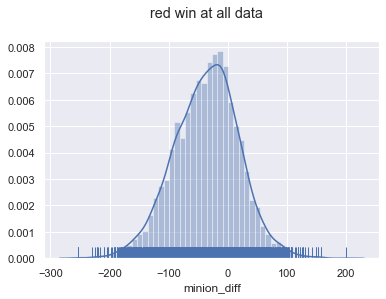

In [188]:
sns.distplot(data_red_win['minion_diff'], kde=True, rug=True)
plt.suptitle('red win at all data', y=1)
plt.show()

In [177]:
data_blue_dragon_red_win_copy = data_blue_dragon_red_win.copy()

In [178]:
'''
red가 역전해서 이긴 경기의 redteam 미니언 획득량 - blueteam 미니언 획득량
'''
data_blue_dragon_red_win_copy['redtotalminion'] = data_blue_dragon_red_win_copy['1stats.totalMinionsKilled'] +\
                                 data_blue_dragon_red_win_copy['2stats.totalMinionsKilled'] +\
                                 data_blue_dragon_red_win_copy['3stats.totalMinionsKilled'] +\
                                 data_blue_dragon_red_win_copy['4stats.totalMinionsKilled'] +\
                                 data_blue_dragon_red_win_copy['5stats.totalMinionsKilled']
data_blue_dragon_red_win_copy['bluetotalminion'] = data_blue_dragon_red_win_copy['6stats.totalMinionsKilled'] +\
                                 data_blue_dragon_red_win_copy['7stats.totalMinionsKilled'] +\
                                 data_blue_dragon_red_win_copy['8stats.totalMinionsKilled'] +\
                                 data_blue_dragon_red_win_copy['9stats.totalMinionsKilled'] +\
                                 data_blue_dragon_red_win_copy['10stats.totalMinionsKilled']
data_blue_dragon_red_win_copy['minion_diff'] = data_blue_dragon_red_win_copy['redtotalminion'] - data_blue_dragon_red_win_copy['bluetotalminion']

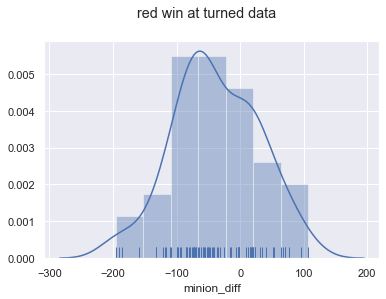

In [189]:
sns.distplot(data_blue_dragon_red_win_copy['minion_diff'], kde=True, rug=True)
plt.suptitle('red win at turned data', y=1)
plt.show()

In [180]:
'''
blue 팀이 이긴 모든 경기의 blueteam 미니언 획득량 - redteam 미니언 획득량
'''
data_blue_win['redtotalminion'] = data_blue_win['1stats.totalMinionsKilled'] +\
                                 data_blue_win['2stats.totalMinionsKilled'] +\
                                 data_blue_win['3stats.totalMinionsKilled'] +\
                                 data_blue_win['4stats.totalMinionsKilled'] +\
                                 data_blue_win['5stats.totalMinionsKilled']
data_blue_win['bluetotalminion'] = data_blue_win['6stats.totalMinionsKilled'] +\
                                 data_blue_win['7stats.totalMinionsKilled'] +\
                                 data_blue_win['8stats.totalMinionsKilled'] +\
                                 data_blue_win['9stats.totalMinionsKilled'] +\
                                 data_blue_win['10stats.totalMinionsKilled']
data_blue_win['minion_diff'] = data_blue_win['bluetotalminion'] - data_blue_win['redtotalminion']

C:\Users\zone\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\zone\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\zone\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/ind

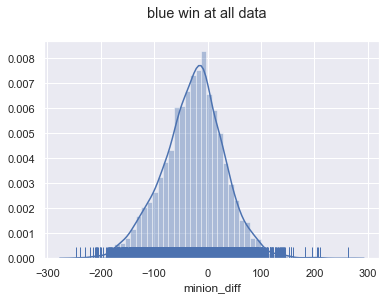

In [190]:
sns.distplot(data_blue_win['minion_diff'], kde=True, rug=True)
plt.suptitle('blue win at all data', y=1)
plt.show()

In [182]:
data_red_dragon_blue_win_copy = data_red_dragon_blue_win.copy()

In [183]:
'''
blue가 역전해서 이긴 경기의 blueteam 미니언 획득량 - redteam 미니언 획득량
'''
data_red_dragon_blue_win_copy['redtotalminion'] = data_red_dragon_blue_win_copy['1stats.totalMinionsKilled'] +\
                                 data_red_dragon_blue_win_copy['2stats.totalMinionsKilled'] +\
                                 data_red_dragon_blue_win_copy['3stats.totalMinionsKilled'] +\
                                 data_red_dragon_blue_win_copy['4stats.totalMinionsKilled'] +\
                                 data_red_dragon_blue_win_copy['5stats.totalMinionsKilled']
data_red_dragon_blue_win_copy['bluetotalminion'] = data_red_dragon_blue_win_copy['6stats.totalMinionsKilled'] +\
                                 data_red_dragon_blue_win_copy['7stats.totalMinionsKilled'] +\
                                 data_red_dragon_blue_win_copy['8stats.totalMinionsKilled'] +\
                                 data_red_dragon_blue_win_copy['9stats.totalMinionsKilled'] +\
                                 data_red_dragon_blue_win_copy['10stats.totalMinionsKilled']
data_red_dragon_blue_win_copy['minion_diff'] = data_red_dragon_blue_win_copy['bluetotalminion'] - data_red_dragon_blue_win_copy['redtotalminion']

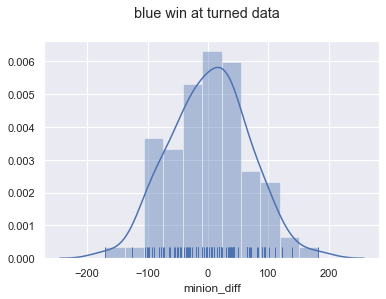

In [191]:
sns.distplot(data_red_dragon_blue_win_copy['minion_diff'], kde=True, rug=True)
plt.suptitle('blue win at turned data', y=1)
plt.show()